In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sb

In [29]:
data=pd.read_csv('voice.csv')

In [30]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [56]:
data.isnull().values.any()

False

In [32]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [33]:
corelation= data.corr()

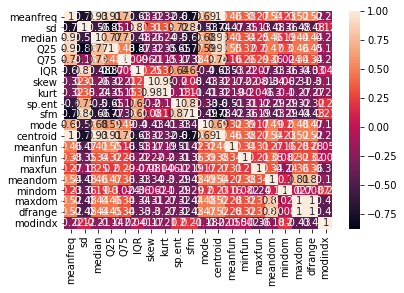

In [34]:
sb.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

In [35]:
sb.pairplot(data)

Output hidden; open in https://colab.research.google.com to view.

In [36]:
X=data.iloc[:,:-1].values

In [37]:
Y=data.iloc[:,-1].values

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)

In [39]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [91]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3)

In [92]:
xtrain.shape

(2217, 20)

In [93]:
xtest.shape

(951, 20)

In [94]:
ann=tf.keras.Sequential()

In [95]:
ann.add(tf.keras.layers.Dense(units=20,activation="relu"))

In [96]:
ann.add(tf.keras.layers.Dense(units=15,activation="relu"))

In [97]:
ann.add(tf.keras.layers.Dense(units=10,activation="relu"))

In [98]:
ann.add(tf.keras.layers.Dense(units=5,activation="relu"))

In [99]:
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [106]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [107]:
ann.fit(xtrain,ytrain,batch_size=20,epochs=40)

Epoch 1/40
111/111 [==============================] - 0s 1ms/step - loss: 0.2300 - accuracy: 0.9161
Epoch 2/40
111/111 [==============================] - 0s 1ms/step - loss: 0.2266 - accuracy: 0.9197
Epoch 3/40
111/111 [==============================] - 0s 1ms/step - loss: 0.2398 - accuracy: 0.9188
Epoch 4/40
111/111 [==============================] - 0s 1ms/step - loss: 0.2185 - accuracy: 0.9188
Epoch 5/40
111/111 [==============================] - 0s 1ms/step - loss: 0.2060 - accuracy: 0.9188
Epoch 6/40
111/111 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.9215
Epoch 7/40
111/111 [==============================] - 0s 2ms/step - loss: 0.2157 - accuracy: 0.9224
Epoch 8/40
111/111 [==============================] - 0s 2ms/step - loss: 0.2141 - accuracy: 0.9179
Epoch 9/40
111/111 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9283
Epoch 10/40
111/111 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9301

In [108]:
ypre=ann.predict(xtest)

In [109]:
ypre

array([[9.16407347e-01],
       [8.54748487e-03],
       [9.95209575e-01],
       [6.36482239e-03],
       [3.84640694e-03],
       [1.54241920e-03],
       [1.90529790e-05],
       [9.96843338e-01],
       [9.85235691e-01],
       [9.78164315e-01],
       [9.83511209e-01],
       [9.82891619e-02],
       [9.96072292e-01],
       [1.91721916e-01],
       [9.86755073e-01],
       [9.41513479e-01],
       [9.71917510e-01],
       [9.97053981e-01],
       [9.57713962e-01],
       [3.68939042e-02],
       [6.82353973e-04],
       [9.04074311e-03],
       [8.43299495e-05],
       [9.78101909e-01],
       [1.99768245e-02],
       [2.49713557e-05],
       [4.78571355e-02],
       [9.66283917e-01],
       [2.19086707e-02],
       [9.97465134e-01],
       [9.65140224e-01],
       [1.40371919e-03],
       [4.97734547e-03],
       [9.86266553e-01],
       [4.37110662e-04],
       [9.92404878e-01],
       [9.70488787e-01],
       [2.90873668e-05],
       [1.36971474e-04],
       [2.31656432e-03],


In [113]:
from sklearn.metrics import confusion_matrix,accuracy_score
cf=confusion_matrix(ytest,ypre.round())
accuracy_score(ytest,ypre.round())

0.9474237644584648